In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In [2]:
ds1 = xr.open_dataset("ocean_sfc_u_223x_225x.nc", engine="netcdf4")

In [3]:
ds2 = xr.open_dataset("ocean_sfc_v_223x225x.nc", engine="netcdf4")

In [4]:
ds1

<xarray.Dataset> Size: 162MB
Dimensions:     (Time: 360, bnds: 2, xq: 360, yh: 312)
Coordinates:
  * Time        (Time) datetime64[ns] 3kB 2230-01-31T12:00:00 ... 2259-12-31T...
  * xq          (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh          (yh) float64 2kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Dimensions without coordinates: bnds
Data variables:
    Time_bnds   (Time, bnds) datetime64[ns] 6kB ...
    SSU         (Time, yh, xq) float32 162MB ...
    average_DT  (Time) timedelta64[ns] 3kB ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Mar 04 15:19:41 2024: cdo mergetime ocean_sfc_u_223x_22...
    filename:     22300101.ocean_sfc_u_2230_01.nc
    title:        GOLD_SIS
    grid_type:    regular
    grid_tile:    N/A
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [5]:
ds2

<xarray.Dataset> Size: 162MB
Dimensions:     (Time: 360, bnds: 2, xh: 360, yq: 312)
Coordinates:
  * Time        (Time) datetime64[ns] 3kB 2230-01-31T12:00:00 ... 2259-12-31T...
  * xh          (xh) float64 3kB -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yq          (yq) float64 2kB -89.5 -89.0 -88.5 -87.99 ... 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    Time_bnds   (Time, bnds) datetime64[ns] 6kB ...
    SSV         (Time, yq, xh) float32 162MB ...
    average_DT  (Time) timedelta64[ns] 3kB ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Mar 04 16:06:54 2024: cdo mergetime ocean_sfc_v_223x224...
    filename:     22300101.ocean_sfc_v_2230_01.nc
    title:        GOLD_SIS
    grid_type:    regular
    grid_tile:    N/A
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [6]:
# Cria um novo dataset utilizando o primeiro tempo do arquivo 
ssu = ds1.SSU.isel(Time=0).data

ds1n = xr.Dataset(
    {
        'ssu': (['lat', 'lon'], ssu),
    },
    coords={
        'lat': ds1.yh.data,  # Coordenadas de latitude
        'lon': ds1.xq.data   # Coordenadas de longitude
    }
)

In [7]:
ds1n

<xarray.Dataset> Size: 455kB
Dimensions:  (lat: 312, lon: 360)
Coordinates:
  * lat      (lat) float64 2kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
Data variables:
    ssu      (lat, lon) float32 449kB nan nan nan nan nan ... nan nan nan nan

In [8]:
# Cria um novo dataset utilizando o primeiro tempo do arquivo 
ssv = ds2.SSV.isel(Time=0).data

ds2n = xr.Dataset(
    {
        'ssv': (['lat', 'lon'], ssv),
    },
    coords={
        'lat': ds2.yq.data,  # Coordenadas de latitude
        'lon': ds2.xh.data   # Coordenadas de longitude    
    }
)

In [9]:
ds2n

<xarray.Dataset> Size: 455kB
Dimensions:  (lat: 312, lon: 360)
Coordinates:
  * lat      (lat) float64 2kB -89.5 -89.0 -88.5 -87.99 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 3kB -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
Data variables:
    ssv      (lat, lon) float32 449kB nan nan nan nan nan ... nan nan nan nan

In [12]:
# Cria um novo dataset utilizando o primeiro tempo do arquivo 
# Esse dataset é o mesmo que ds2n, mas com as mesmas coordenadas que ds1
ssv = ds2.SSV.isel(Time=0).data

ds3n = xr.Dataset(
    {
        'ssv': (['lat', 'lon'], ssv),
    },
    coords={
        'lat': ds1.yh.data,  # Coordenadas de latitude
        'lon': ds1.xq.data   # Coordenadas de longitude        
    }
)

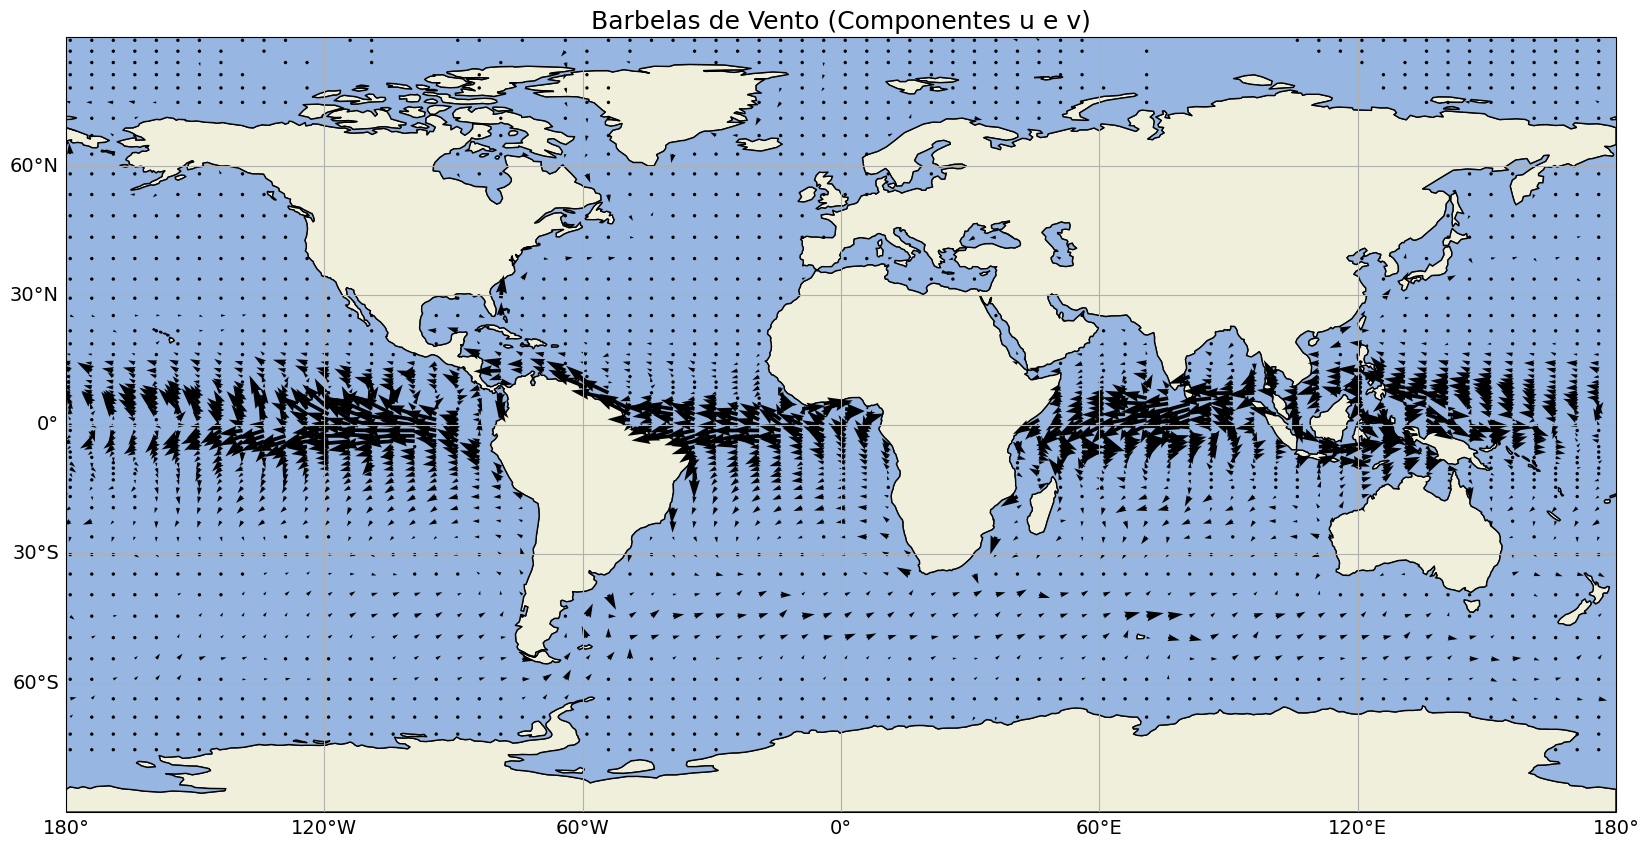

In [13]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html
skip = 5
ds1n_s = ds1n.isel(lat=slice(None, None, skip), lon=slice(None, None, skip))
ds2n_s = ds2n.isel(lat=slice(None, None, skip), lon=slice(None, None, skip))

fig = plt.figure(figsize=(20, 16))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

#ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN)

plt.quiver(ds1n_s["lon"], ds1n_s["lat"], 
           ds1n_s["ssu"], ds2n_s["ssv"], 
           angles="xy", 
           scale_units="xy", 
           scale=0.08, 
           color="black", transform=ccrs.PlateCarree())

plt.title("Barbelas de Vento (Componentes u e v)", fontsize=18)
#plt.xlabel("Longitude", fontsize=18)
#plt.ylabel("Latitude", fontsize=18)

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"size": 14, "color": "black"}
gl.ylabel_style = {"size": 14, "color": "black"}

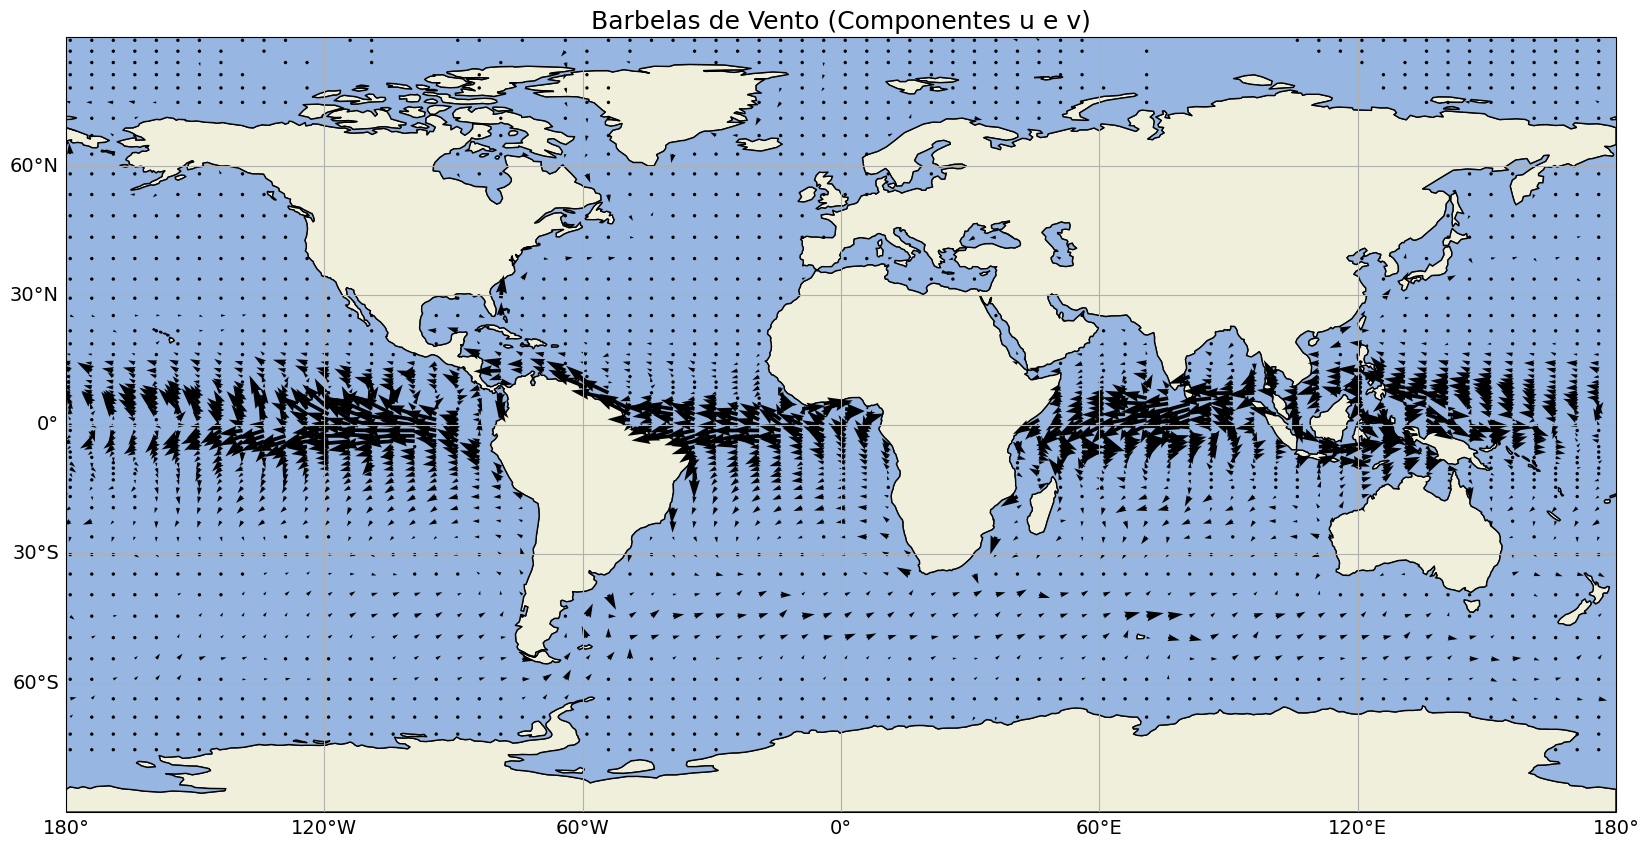

In [14]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html
skip = 5
ds1n_s = ds1n.isel(lat=slice(None, None, skip), lon=slice(None, None, skip))
ds3n_s = ds3n.isel(lat=slice(None, None, skip), lon=slice(None, None, skip))

fig = plt.figure(figsize=(20, 16))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

#ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN)

plt.quiver(ds1n_s["lon"], ds1n_s["lat"], 
           ds1n_s["ssu"], ds3n_s["ssv"], 
           angles="xy", 
           scale_units="xy", 
           scale=0.08, 
           color="black", transform=ccrs.PlateCarree())

plt.title("Barbelas de Vento (Componentes u e v)", fontsize=18)
#plt.xlabel("Longitude", fontsize=18)
#plt.ylabel("Latitude", fontsize=18)

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"size": 14, "color": "black"}
gl.ylabel_style = {"size": 14, "color": "black"}